# 线性回归 Linear regression
- 通过拟合历史数据，建立模型，用模型去预测未知参数的值的过程

$$ y_{pred} = wx + b$$

## 损失函数

$$ J = \frac{1}{2m} \sum\limits_{i=1}^{m}({y_{pred} - y})^2 $$

## 如何求损失函数的最小值

### 梯度下降 gradient descent

$$ w_{new} = w_{old} - \alpha \frac {\partial J}{\partial w} $$

$$ b_{new} = b_{old} - \alpha \frac {\partial J}{\partial b} $$

$$ \frac{\partial J}{\partial w_{old}} = \frac{1}{m} \sum\limits_{1}^{m} ({y_{pred} - y }) x$$

$$ \frac{\partial J}{\partial b_{old}} = \frac{1}{m} \sum\limits_{1}^{m} ({y_{pred} - y }) $$

# 代码实现公式

In [3]:
from sklearn.datasets import load_boston
import seaborn as sns
sns.set()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = load_boston()
features = data.data[:, 5]
target = data.target
features.shape

(506,)

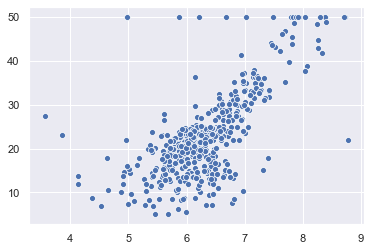

In [58]:
sns.scatterplot(features, target)

In [7]:
alpha, w, b = np.random.random(3) / 100
print(alpha, w, b)
update_cnt = 0
flag = 1
min_loss = float('inf')
data_size = features.shape[0]
loss = []

0.007795433071427068 0.004610721662435313 0.00520147906973707


In [62]:
while flag:
    update_cnt += 1
    y_pred = w * features + b
    current_loss = np.sum(np.square(y_pred - target)) / data_size
    if current_loss < min_loss:
        if min_loss - current_loss < .00001:
            flag = 0
        min_loss = current_loss
    w = w - alpha * np.sum((y_pred - target) * features) / data_size
    b = b - alpha * np.sum(y_pred - target) / data_size
    
    if update_cnt % 1000 == 0:
        print(f"第 {update_cnt} 次迭代， 当前损失： {min_loss}")
        loss.append(current_loss)
print(f"总共迭代次数： {update_cnt}, 损失为 {min_loss}， 最佳参数：w:{w}, b:{b}")

0.009539126990692986 0.005906733762844087 0.006392795751220205
第 1000 次迭代， 当前损失： 55.76482767384818
第 2000 次迭代， 当前损失： 53.271252292462215
第 3000 次迭代， 当前损失： 51.28883912347601
第 4000 次迭代， 当前损失： 49.71280416503589
第 5000 次迭代， 当前损失： 48.45984326410745
第 6000 次迭代， 当前损失： 47.46372892613029
第 7000 次迭代， 当前损失： 46.67180974206923
第 8000 次迭代， 当前损失： 46.04222740380326
第 9000 次迭代， 当前损失： 45.541704208211755
第 10000 次迭代， 当前损失： 45.14378410452026
第 11000 次迭代， 当前损失： 44.82743431230987
第 12000 次迭代， 当前损失： 44.57593359620345
第 13000 次迭代， 当前损失： 44.37598843499412
第 14000 次迭代， 当前损失： 44.21703036875104
第 15000 次迭代， 当前损失： 44.090657383924054
第 16000 次迭代， 当前损失： 43.99018980985542
第 17000 次迭代， 当前损失： 43.910317252812824
第 18000 次迭代， 当前损失： 43.846817905608894
第 19000 次迭代， 当前损失： 43.79633539641393
第 20000 次迭代， 当前损失： 43.756201381706134
第 21000 次迭代， 当前损失： 43.724294506191164
第 22000 次迭代， 当前损失： 43.69892827476532
第 23000 次迭代， 当前损失： 43.67876190979335
第 24000 次迭代， 当前损失： 43.662729481903085
第 25000 次迭代， 当前损失： 43.64998356837757
总共迭代次数： 25549

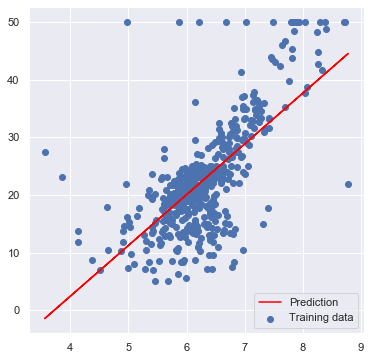

In [63]:
plt.figure(figsize=(6,6))
plt.scatter(features, target, label='Training data')
plt.plot(features, w * features + b, color='red', label='Prediction')
plt.legend()
plt.show()

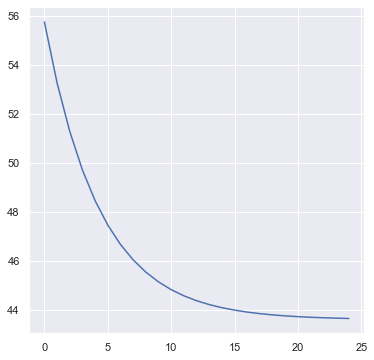

In [64]:
plt.figure(figsize=(6,6))
plt.plot(range(len(loss)), loss)
plt.show()

### tensorflow api

In [2]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [13]:
w = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')
alpha = np.random.random() / 100

def linear_regression(x):
    return w * x + b

def mean_square(y_pred, y):
    return tf.reduce_sum(tf.pow(y_pred-y, 2)) / data_size

optimizer = tf.optimizers.SGD(alpha)

def run():
    with tf.GradientTape() as g:
        pred = linear_regression(features)
        loss = mean_square(pred, target)
    gradients = g.gradient(loss, [w, b])
    optimizer.apply_gradients(zip(gradients, [w, b]))

In [14]:
max_step = 10000
for step in range(1, max_step+1):
    run()
    if not step % 1000:
        pred = linear_regression(features)
        loss = mean_square(pred, target)
        print(f"step: {step}, loss: {loss}, w:{w.numpy()}, b:{b.numpy()}")

step: 1000, loss: 59.19038391113281, w:3.5100903511047363, b:0.9008610844612122
step: 2000, loss: 58.91459274291992, w:3.559774160385132, b:0.5848239064216614
step: 3000, loss: 58.643680572509766, w:3.609016180038452, b:0.27159520983695984
step: 4000, loss: 58.377567291259766, w:3.6578187942504883, b:-0.038850221782922745
step: 5000, loss: 58.11616516113281, w:3.706185817718506, b:-0.34653887152671814
step: 6000, loss: 57.859375, w:3.7541275024414062, b:-0.6514943242073059
step: 7000, loss: 57.60713577270508, w:3.8016438484191895, b:-0.9537397623062134
step: 8000, loss: 57.35935974121094, w:3.8487374782562256, b:-1.2532981634140015
step: 9000, loss: 57.115962982177734, w:3.8954076766967773, b:-1.5501956939697266
step: 10000, loss: 56.87686538696289, w:3.941667079925537, b:-1.8444572687149048


In [16]:
alpha

0.00037111917748988254

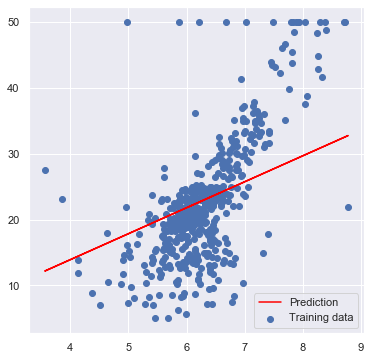

In [15]:
plt.figure(figsize=(6,6))
plt.scatter(features, target, label='Training data')
plt.plot(features, w * features + b, color='red', label='Prediction')
plt.legend()
plt.show()

## keras api

In [31]:
w, b = np.random.random(size=2) / 100

In [32]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer='SGD', loss='mean_squared_error')
model.fit(features, target, epochs=10000, 
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)])

Train on 506 samples
Epoch 1/10000
506/506 [==============================] - 0s 494us/sample - loss: 113.7860
Epoch 2/10000
506/506 [==============================] - 0s 41us/sample - loss: 60.7043
Epoch 3/10000
506/506 [==============================] - 0s 45us/sample - loss: 61.9424


In [34]:
w = model.weights[0].numpy()
b = model.weights[1].numpy()

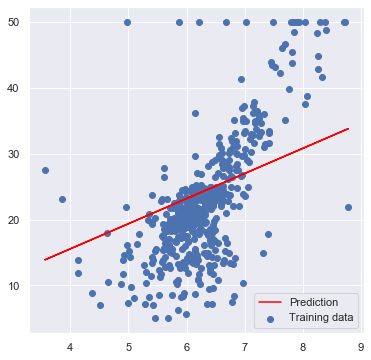

In [35]:
plt.figure(figsize=(6,6))
plt.scatter(features, target, label='Training data')
plt.plot(features, (w * features + b).ravel(), color='red', label='Prediction')
plt.legend()
plt.show()

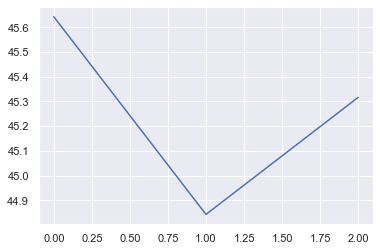

In [25]:
plt.plot(model.history.history['loss'])